In [1]:
from ZHSift import ZHSift
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
sift = cv2.SIFT_create()
zhsift = ZHSift(0,True)

In [3]:
img1 = cv2.imread('./img/k1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('./img/k2.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
print(img1.shape)

(4000, 3000)


In [4]:
kp3,des3 = sift.detectAndCompute(img1,None)
kp4,des4 = sift.detectAndCompute(img2,None)
print(des4.shape)

(17998, 128)


In [5]:
kp1 ,des1 = zhsift.detectAndCompute(img1)
kp2 ,des2 = zhsift.detectAndCompute(img2)
print(des2.shape)

AttributeError: module 'ZHSift' has no attribute 'KeyPoint'

In [ ]:
type(kp1[0])

In [ ]:
type(kp1[0].pt)

In [8]:
type(kp3[0].pt)

tuple

In [9]:
bf = cv2.BFMatcher()

In [10]:
matches = bf.knnMatch(des1, des2, k=2)
good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

In [11]:
if len(good)>10:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

In [12]:
def trans_keypoints(kps):
    cv_kps = [ cv2.KeyPoint(
                            x = kp.pt[0],
                            y = kp.pt[1],
                            _size = kp.size,
                            _angle = kp.angle,
                            _response = kp.response,
                            _octave = kp.octave,
                            _class_id = kp.class_id) for kp in kps ] 
    return cv_kps

In [14]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
# kp1 = trans_keypoints(kp1)
# kp2 = trans_keypoints(kp2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

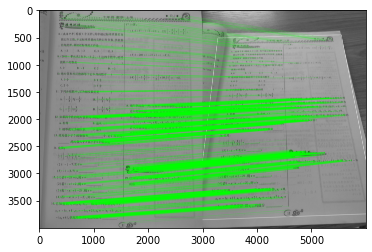

In [15]:
plt.imshow(img3)

In [16]:
cv2.imwrite('match.jpg',img3)

True